# Assignment 1

## Read data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read training data
D = pd.read_csv("DST_BIL54.csv")

# Equivalent di str(D) in R
print(D.info())
print(D.head())

D["time"] = pd.to_datetime(D["time"].astype(str) + "-01", format="%Y-%m-%d", utc=True)

print(D["time"])
print(D["time"].dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   time          84 non-null     object
 1   total         84 non-null     int64 
 2   gasoline      84 non-null     int64 
 3   diesel        84 non-null     int64 
 4   fgas          84 non-null     int64 
 5   ngas          84 non-null     int64 
 6   electricity   84 non-null     int64 
 7   petroleum     84 non-null     int64 
 8   hydrogen      84 non-null     int64 
 9   methanol      84 non-null     int64 
 10  ethanol       84 non-null     int64 
 11  pluginhybrid  84 non-null     int64 
 12  otherfuels    84 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 8.7+ KB
None
      time    total  gasoline   diesel  fgas  ngas  electricity  petroleum  \
0  2018-01  2930483   1781826  1136656    12   256         9304          0   
1  2018-02  2934044   1783338  1138414    12   255     

## 1. Plot data

(3, 2)
(3,)


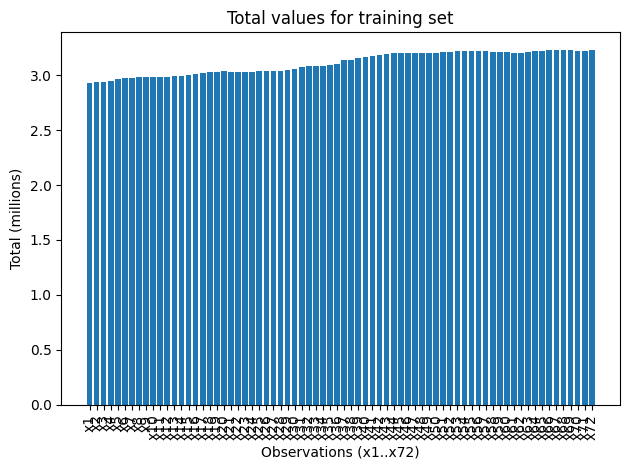

In [ ]:
D["year"] = D["time"].dt.year + (D["time"].dt.month - 1) / 12.0

# Make output variable floating point and scale
D["total"] = pd.to_numeric(D["total"], errors="coerce") / 1e6

# Divide into train and test set
teststart = pd.Timestamp("2024-01-01", tz="UTC")
Dtrain = D[D["time"] < teststart].copy()
#Dtest  = D[D["time"] >= teststart].copy()
X = Dtrain["year"].values

y = Dtrain["total"].to_numpy()          # heights
n = len(y)

x_labels = [f"x{i}" for i in range(1, n+1)]  # x1..xn
x_pos = np.arange(n)                         # 0..n-1 positions

plt.figure()
plt.bar(x_pos, y)

plt.xticks(x_pos, x_labels, rotation=90)  # rotate so labels fit
plt.xlabel("Observations (x1..x{})".format(n))
plt.ylabel("Total (millions)")
plt.title("Total values for training set")
plt.tight_layout()
#plt.show()
#print("Train shape:", Dtrain.shape)
##print("Test shape:", Dtest.shape)
#Dtrain.to_csv("train.csv", index=False)
#Dtest.to_csv("test.csv", index=False)

## 2. Defining X and y

In [4]:
y3 = Dtrain["total"].iloc[:3].to_numpy()
x3 = Dtrain["year"].iloc[:3].to_numpy()
x3 = np.c_[np.ones(3), x3]   # adds a column of 1s in front

print(x3.shape)  # should be [2018. , 2018.0833..., 2018.1666...]
print(y3.shape)  # your first 3 totals (in millions)

(3, 2)
(3,)
